In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/content/Youtube-Spam-Dataset.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


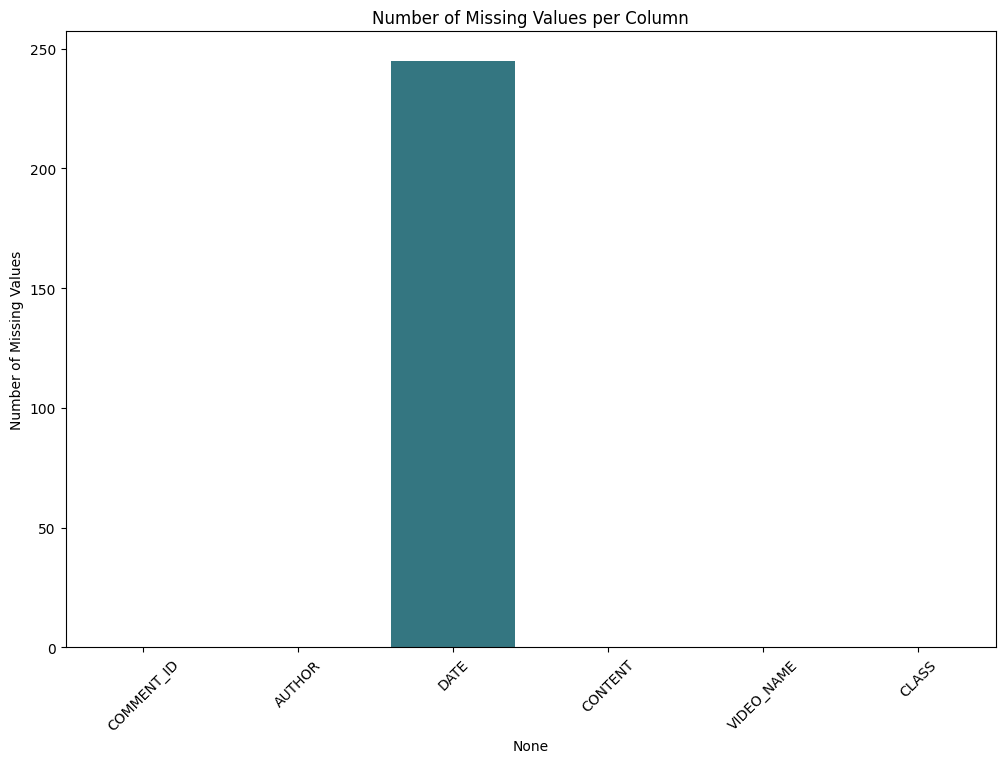

In [4]:
# Check for missing values in the dataframe
missing_values = df.isna().sum()

# Plotting the number of missing values for each column
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='viridis')

plt.title('Number of Missing Values per Column')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')

plt.show()

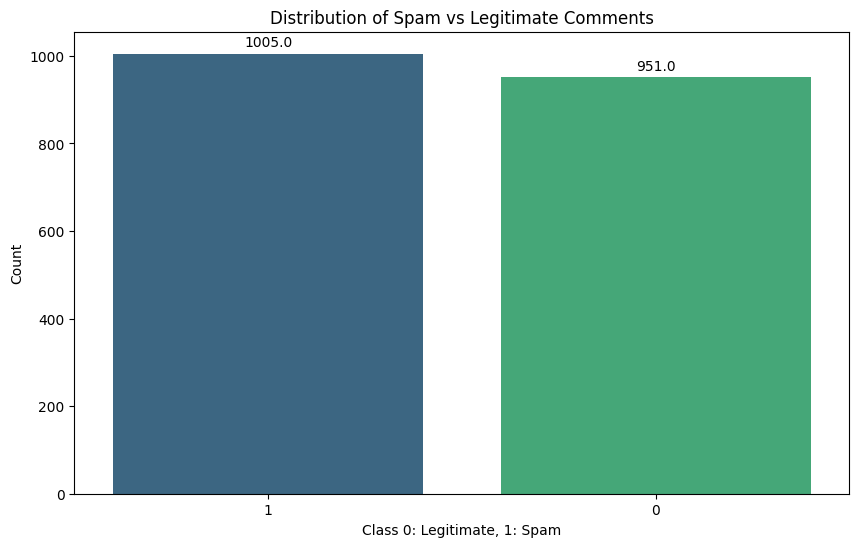

In [5]:
# Distribution of Spam vs Legitimate
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x=df['CLASS'].astype(str), hue=df['CLASS'].astype(str), palette='viridis')

# Annotate each bar with the exact value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Spam vs Legitimate Comments')
plt.xlabel('Class 0: Legitimate, 1: Spam')
plt.ylabel('Count')

plt.show()

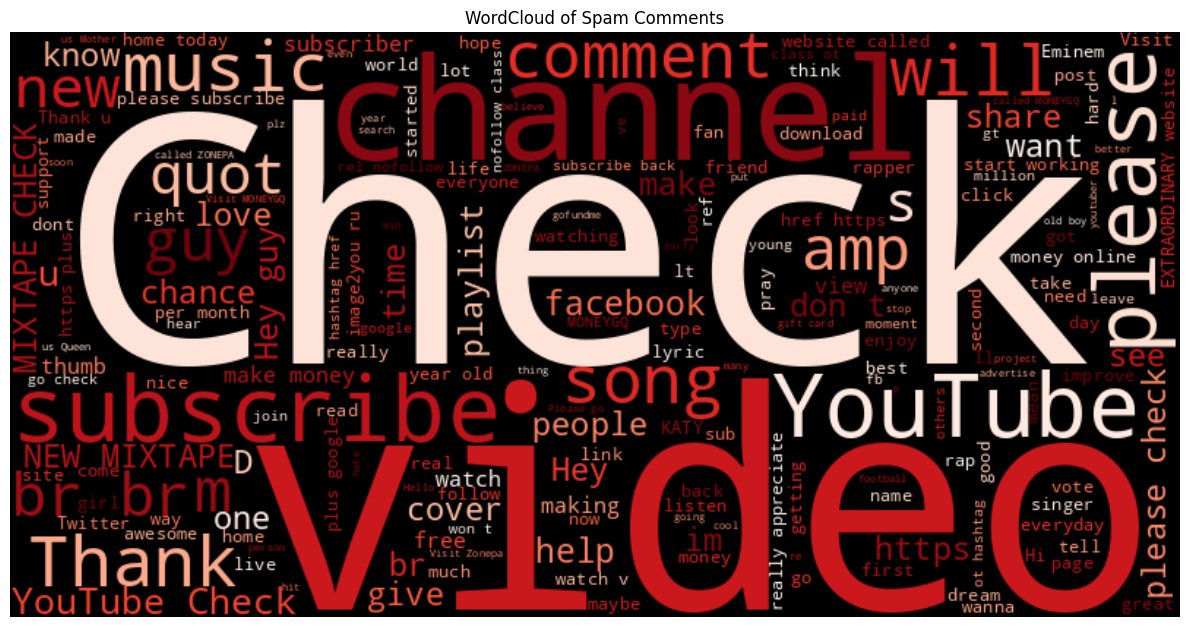

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all spam comments into a single string
spam_comments = ' '.join(df[df['CLASS'] == 1]['CONTENT'])

# Generate the WordCloud for spam comments
spam_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_comments)

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('WordCloud of Spam Comments')
plt.tight_layout()
plt.show()

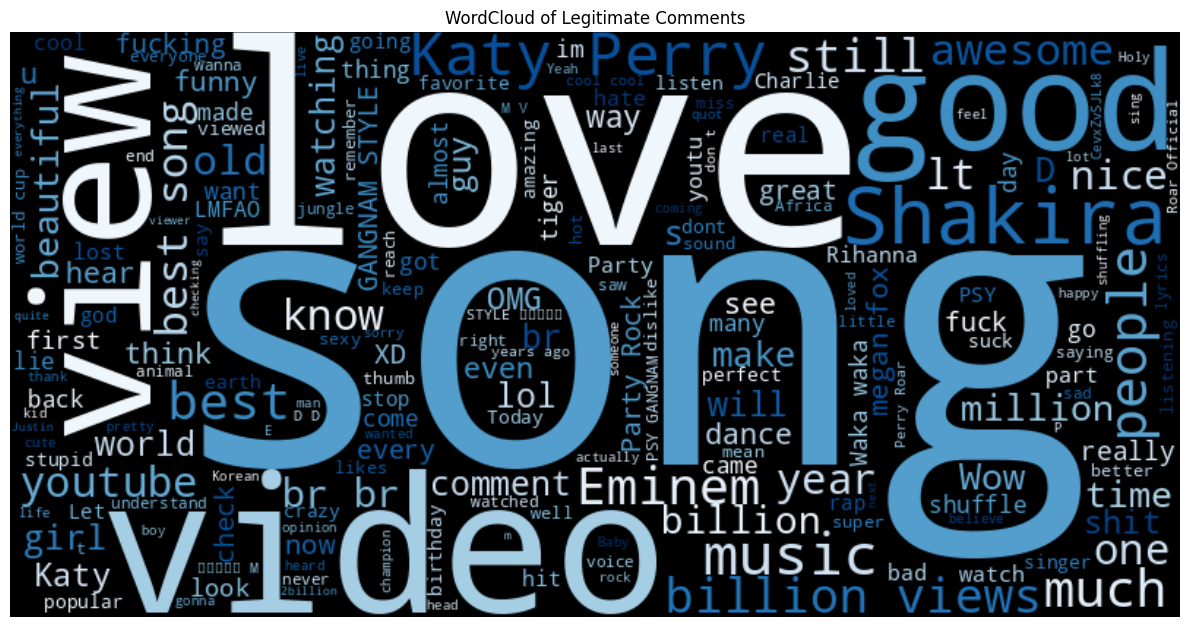

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all legitimate comments into a single string
legitimate_comments = ' '.join(df[df['CLASS'] == 0]['CONTENT'])

# Generate the WordCloud for legitimate comments
legitimate_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(legitimate_comments)

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(legitimate_wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('WordCloud of Legitimate Comments')
plt.tight_layout()
plt.show()

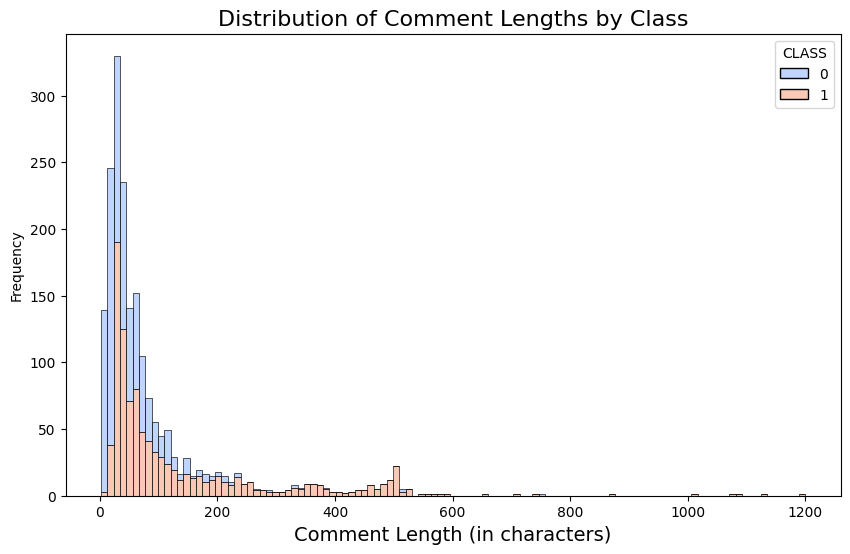

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for the length of each comment
df['Comment Length'] = df['CONTENT'].apply(len)

# Plot the distribution of comment lengths by class
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Comment Length', hue='CLASS', multiple='stack', palette='coolwarm')

plt.title('Distribution of Comment Lengths by Class', fontsize=16)
plt.xlabel('Comment Length (in characters)', fontsize=14)
plt.ylabel('Frequency')

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by class and calculate the mean comment length
print(df.groupby('CLASS')['Comment Length'].mean())

# Visualize the distribution of comment lengths by class
plt.figure(figsize=(8, 6))
sns.boxplot(x='CLASS', y='Comment Length', data=df, hue='CLASS', palette='viridis')
plt.title('Comment Length by Class')
plt.xlabel('Class')
plt.ylabel('Comment Length')

plt.show()

NameError: name 'df' is not defined

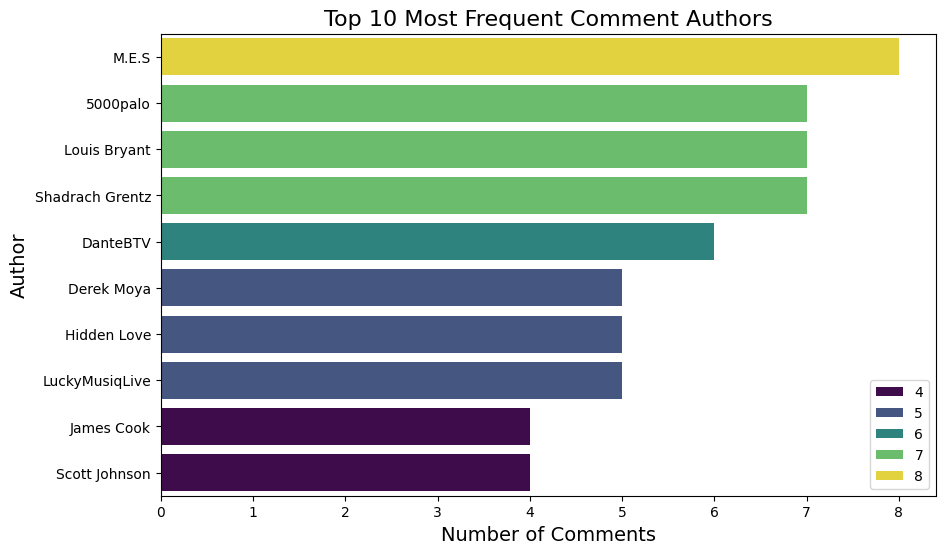

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent comment authors
top_10_authors = df['AUTHOR'].value_counts().head(10)

# Plot the number of comments by top 10 authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_authors.values, y=top_10_authors.index, hue=top_10_authors.values, palette='viridis')

plt.title('Top 10 Most Frequent Comment Authors', fontsize=16)
plt.xlabel('Number of Comments', fontsize=14)import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in the dataframe
missing_values = df.isna().sum()

# Convert to DataFrame for plotting
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'MissingValues']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Column', y='MissingValues', data=missing_df, palette='viridis')

plt.title('Number of Missing Values per Column')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')

plt.tight_layout()
plt.show()

plt.ylabel('Author', fontsize=14)

plt.show()

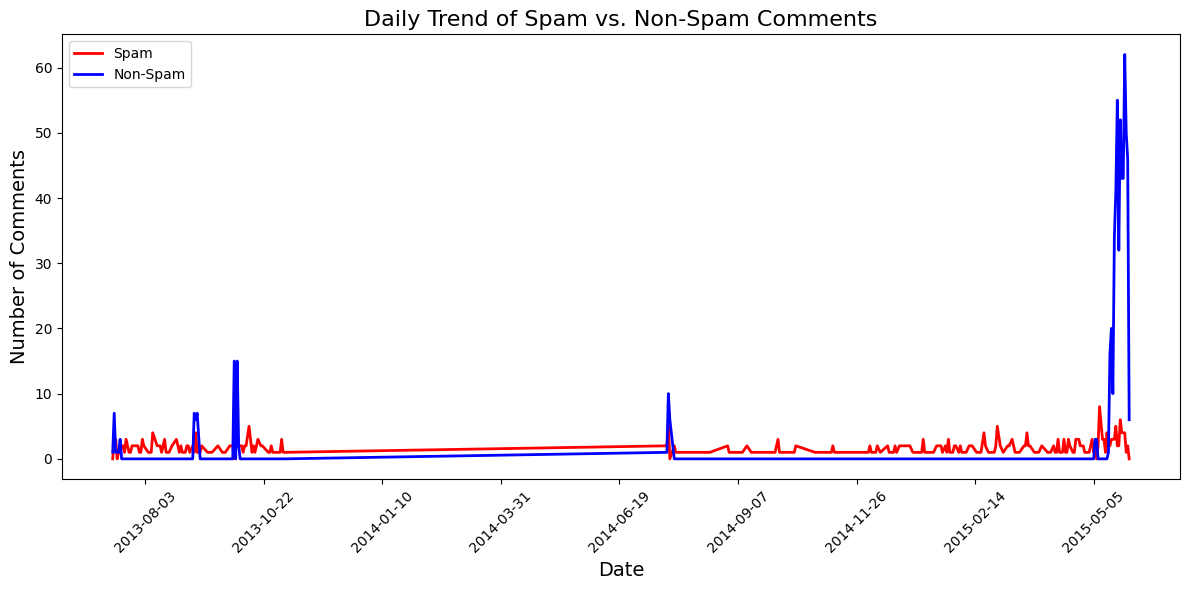

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy the dataframe and convert the 'Date' column to datetime
df_copied = df.copy()
df_copied['Date'] = pd.to_datetime(df_copied['DATE'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

# Group by date and count the number of spam and non-spam comments per day
daily_counts = df_copied.groupby([df_copied['Date'].dt.date, 'CLASS']).size().unstack(fill_value=0)

# Plot the daily trend of spam and non-spam comments
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts[1], label='Spam', color='red', linewidth=2)
plt.plot(daily_counts.index, daily_counts[0], label='Non-Spam', color='blue', linewidth=2)
plt.title('Daily Trend of Spam vs. Non-Spam Comments', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend()

# Show date intervals for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Adjust number of date ticks on x-axis
plt.tight_layout()
plt.show()

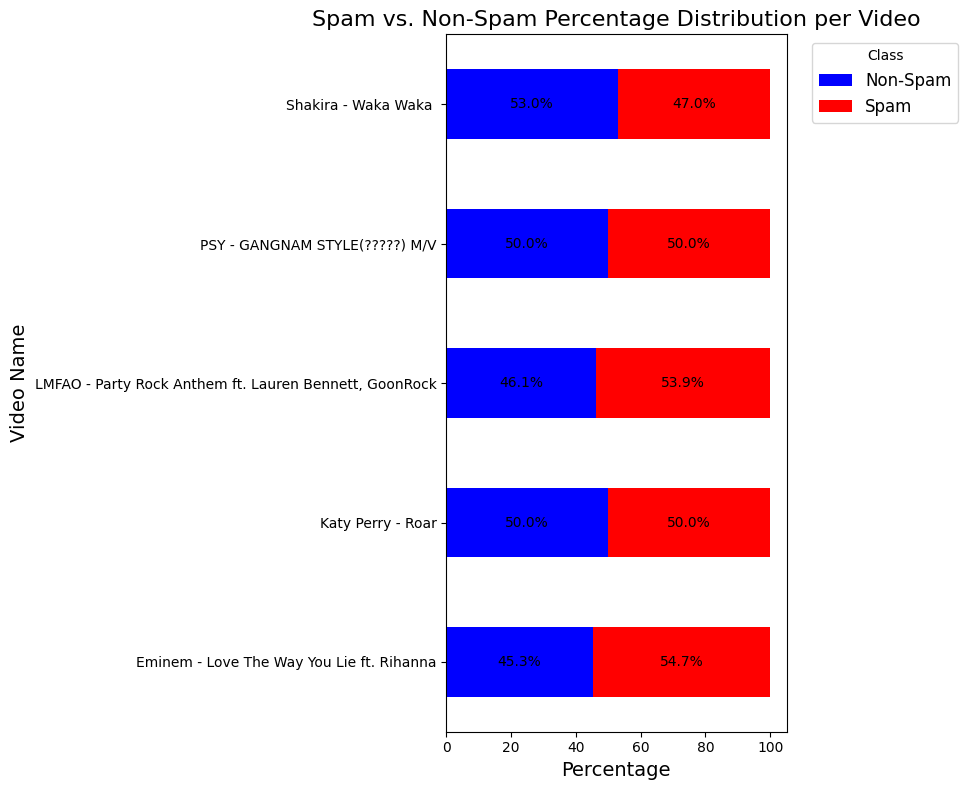

In [ ]:
video_class_counts = df.groupby(['VIDEO_NAME', 'CLASS']).size().unstack(fill_value=0)

# Calculate the percentage for each class (spam/non-spam)
video_class_percent = video_class_counts.div(video_class_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar plot for spam vs. non-spam distribution per video (horizontal)
plt.figure(figsize=(10, 8))
ax = video_class_percent.plot(kind='barh', stacked=True, color=['blue', 'red'], ax=plt.gca())

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

# Move the legend outside of the plot
ax.legend(title='Class', labels=['Non-Spam', 'Spam'], fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Spam vs. Non-Spam Percentage Distribution per Video', fontsize=16)
plt.ylabel('Video Name', fontsize=14)
plt.xlabel('Percentage', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.head(20)

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,Comment Length
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,39
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",PSY - GANGNAM STYLE(?????) M/V,1,82
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,PSY - GANGNAM STYLE(?????) M/V,1,25
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,PSY - GANGNAM STYLE(?????) M/V,0,78
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,PSY - GANGNAM STYLE(?????) M/V,1,47
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,PSY - GANGNAM STYLE(?????) M/V,1,67


In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# Text preprocessing functions
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split(r'\W+', text)  # Corrected regex for splitting
    return tokens

def remove_stopwords(tokens):
    stopwords_list = nltk.corpus.stopwords.words('english')
    return [word for word in tokens if word not in stopwords_list]

def stemming(tokens):
    stemmed_text = [porter_stemmer.stem(word) for word in tokens]
    return stemmed_text

# Load dataset
data = pd.read_csv('/content/Youtube-Spam-Dataset.csv')
data = data[['CONTENT', 'CLASS']]

# Apply text preprocessing
data['CONTENT'] = data['CONTENT'].apply(lambda x: remove_punctuation(x))
data['CONTENT'] = data['CONTENT'].apply(lambda x: x.lower())
data['CONTENT'] = data['CONTENT'].apply(lambda x: tokenization(x))
data['CONTENT'] = data['CONTENT'].apply(lambda x: remove_stopwords(x))
data['CONTENT'] = data['CONTENT'].apply(lambda x: stemming(x))

# Join the tokens back into a string for each row
data['CONTENT'] = data['CONTENT'].apply(lambda x: ' '.join(x))

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = data['CONTENT']
y = data['CLASS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Vectorize the text data
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# List of models to apply
models = {
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "SVC": SVC(random_state=1),
    "XGBoost": XGBClassifier(random_state=1),
    "LightGBM": LGBMClassifier(random_state=1, verbose=-1),
    "MultinomialNB": MultinomialNB(),
    "ExtraTrees": ExtraTreesClassifier(random_state=1),
    "Bagging Classifier": BaggingClassifier(random_state=1)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    print(f"Results for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n-----------------------------\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Training Logistic Regression...
Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       187
           1       0.96      0.83      0.89       205

    accuracy                           0.89       392
   macro avg       0.90      0.90      0.89       392
weighted avg       0.90      0.89      0.89       392

Accuracy: 0.8928571428571429

-----------------------------

Training KNeighbors Classifier...
Results for KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       187
           1       0.99      0.38      0.55       205

    accuracy                           0.67       392
   macro avg       0.79      0.69      0.65       392
weighted avg       0.80      0.67      0.64       392

Accuracy: 0.673469387755102

-----------------------------

Training Random Forest...
Results for Random Forest:
              precision    recall  f1-

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for ExtraTrees:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       187
           1       0.99      0.83      0.90       205

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.92      0.91      0.91       392

Accuracy: 0.9056122448979592

-----------------------------

Training Bagging Classifier...
Results for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       187
           1       0.98      0.84      0.91       205

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.92      0.91      0.91       392

Accuracy: 0.9081632653061225

-----------------------------

